#  Translocation in the SKBR3 cell line

Here we visualize Illumina paired-end sequencing reads alongside PacBio HiFi sequencing reads, showing a translocation event. Both sequencing datasets were genearated from the [SKBR3 breast cancer cell line](https://en.wikipedia.org/wiki/SKBR3). This example is also used by [IGV Web](https://igv.org/app/).

Data sources:
- Illumina paired-end sequencing: [URL](https://s3.amazonaws.com/igv.org.demo/SKBR3/SKBR3_550bp_pcrFREE_S1_L001_AND_L002_R1_001.101bp.bwamem.ill.mapped.sort.bam)
- PacBio HiFi sequencing: [URL](https://s3.amazonaws.com/igv.org.demo/SKBR3/reads_lr_skbr3.fa_ngmlr-0.2.3_mapped.bam)

Reference:

Nattestad, M., Goodwin, S., Ng, K., Baslan, T., Sedlazeck, F. J., Rescheneder, P., ... & Schatz, M. C. (2018). Complex rearrangements and oncogene amplifications revealed by long-read DNA and RNA sequencing of a breast cancer cell line. Genome research, 28(8), 1126-1135.

In [16]:
import matplotlib.pyplot as plt
import lakeview as lv

In [14]:
CHROMOSOME = "17"
ILLUMINA_BAM_PATH = "../../tests/data/SKBR3_Illumina_550bp_pcrFREE.bam"
PACBIO_BAM_PATH = "../../tests/data/SKBR3_PacBio.bam"

illumina_painter = lv.SequenceAlignment.from_file(
    ILLUMINA_BAM_PATH, region=CHROMOSOME
)
pacbio_painter = lv.SequenceAlignment.from_file(PACBIO_BAM_PATH, region=CHROMOSOME)

gv = lv.GenomeViewer(4, figsize=(12, 15), height_ratios=(1, 8, 1, 8))
illumina_painter.draw_pileup(gv.axes[0])
illumina_painter.draw_alignment(
    gv.axes[1],
    color_by="proper_pair",
    group_by="strand",
    max_rows=30,
)
pacbio_painter.draw_pileup(gv.axes[2])
pacbio_painter.draw_alignment(gv.axes[3])

gv.set_xlim(64040802, 64045633)
gv.axes[1].set_ylabel("Illumina")
gv.axes[3].set_ylabel("PacBio")
gv.set_xlabel("chr17")
gv.set_title("Illumina paired-end sequencing and PacBio HiFi sequencing")

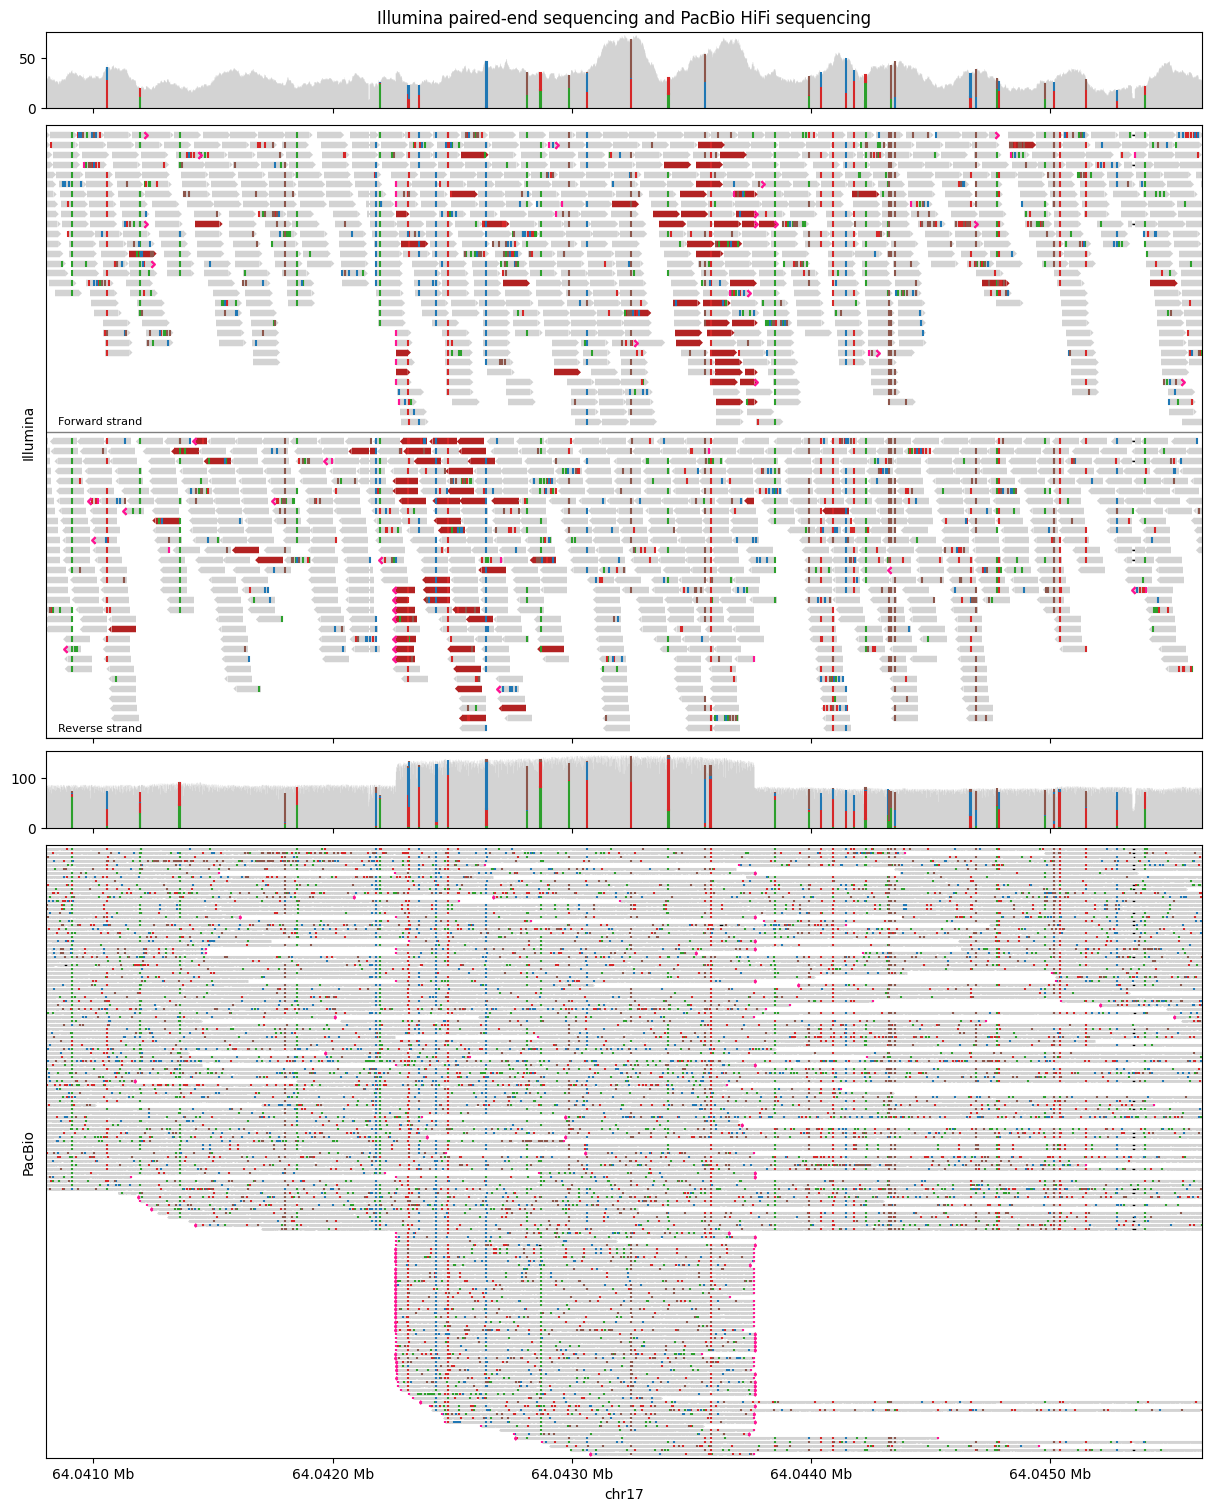

In [15]:
gv.figure